In [32]:
import config, src
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight

In [33]:
data = src.load_data(config.PROCESSED_DATA_COMBINED_RAP_HIPHOP_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


Dans cette partie on se propose d'appliquer les méthodes de classifications de types séquentielles du Boosting. Les méthodes de Boosting remontent á l'article de Friedman sur l'approximation de fonctions "GREEDY" par une optimisation numérique de fonctions. Divers algorithmes tels que AdaBOOST ,XGBOOST ont été developpés ces derniéres années et se sont révéles particulièrement efficaces. On utilise l' estimateur  HistGradientBoostingClassifier car il a l'avantage d'être plus rapide que GradientBoostingClassifier\(\).  



----------------------------------------------------------------------------------------------------

Global accuracy : 0.7012
Global log loss : 0.8257107308374976
Global precision : 0.6861663798652777
Global recall : 0.6807122233138346
Global F1 score : 0.680953695929694
Global ROC-AUC score : 0.9492263677854462

              Precision    Recall  F1 score
Alternative   0.522755  0.421627  0.466776
Anime         0.825996  0.762089  0.792757
Blues         0.666667  0.593536  0.627979
Classical     0.853556  0.854450  0.854003
Country       0.613131  0.615619  0.614372
Electronic    0.726604  0.684836  0.705102
Jazz          0.585613  0.586802  0.586207
Rap/Hip-Hop   0.837058  0.887901  0.861730
Rock          0.544118  0.719550  0.619656

----------------------------------------------------------------------------------------------------


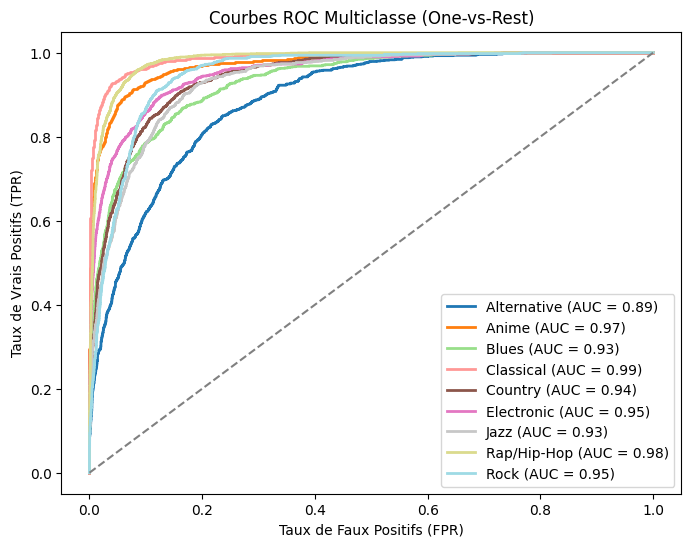

----------------------------------------------------------------------------------------------------


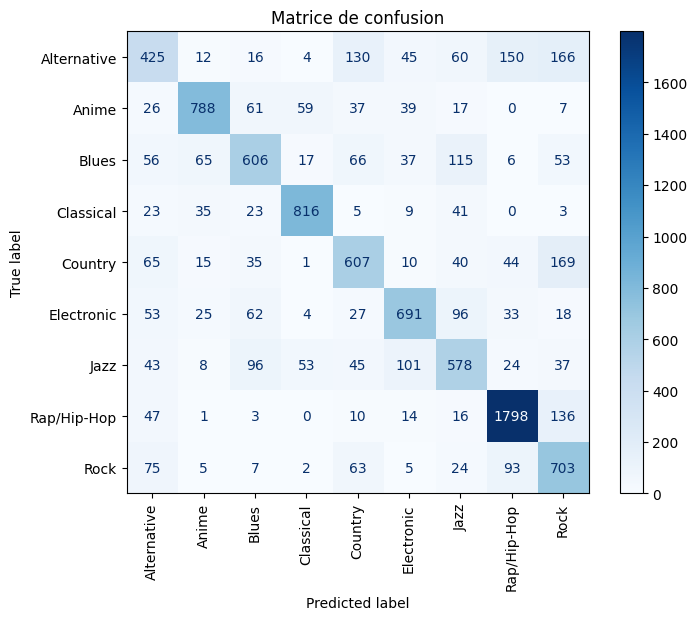

----------------------------------------------------------------------------------------------------


In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer

Gbd=HistGradientBoostingClassifier(learning_rate=0.1,max_iter=100)

Gbd.fit(X_train,y_train)

src.evaluate_model(Gbd, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.7081
Global log loss : 0.8159395409031288
Global precision : 0.6943326046106275
Global recall : 0.6874835724760802
Global F1 score : 0.6874617862943634
Global ROC-AUC score : 0.9502341723126762

              Precision    Recall  F1 score
Alternative   0.558824  0.414683  0.476082
Anime         0.821689  0.762089  0.790768
Blues         0.673333  0.593536  0.630921
Classical     0.862179  0.845026  0.853517
Country       0.626866  0.638945  0.632848
Electronic    0.725532  0.675917  0.699846
Jazz          0.590643  0.615228  0.602685
Rap/Hip-Hop   0.838412  0.896790  0.866619
Rock          0.551515  0.745138  0.633870

----------------------------------------------------------------------------------------------------


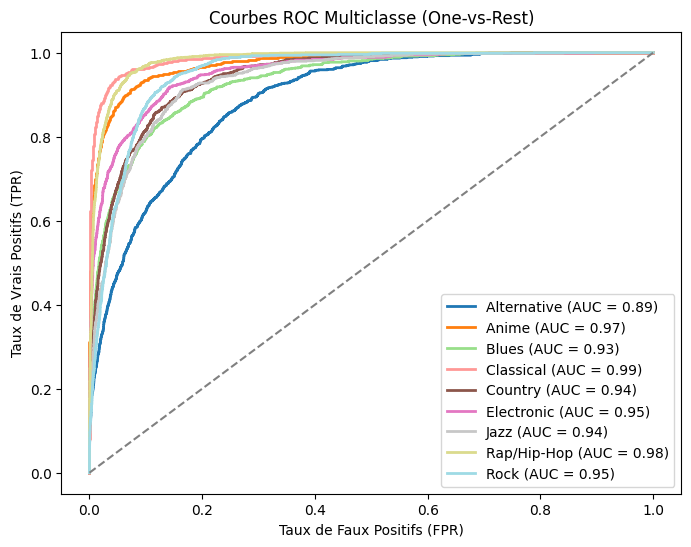

----------------------------------------------------------------------------------------------------


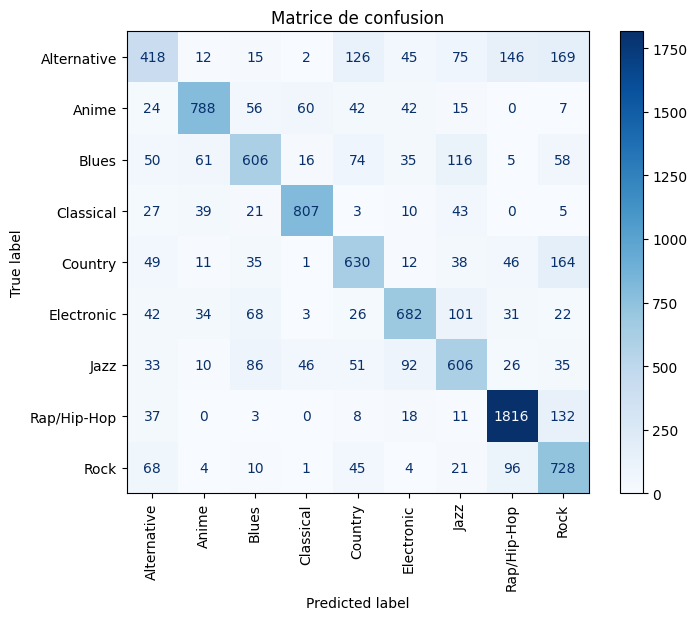

----------------------------------------------------------------------------------------------------


In [35]:
from  xgboost import XGBClassifier

Xgb=XGBClassifier(n_estimators=150,learning_rate=0.1)

Xgb.fit(X_train,y_train)

src.evaluate_model(Xgb, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

On réalise une GridSearch pour améliorer nos résultats.


from sklearn.metrics import make_scorer, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'learning_rate': np.arange(0.05, 1.5, 0.25),
    'max_iter': np.arange(50,200,10)
}


Gbd = HistGradientBoostingClassifier()

scoring = make_scorer(accuracy_score, greater_is_better=True)


grid_search = GridSearchCV(Gbd, param_grid, cv=5, scoring=scoring)
grid_search.fit(X_train, y_train)


scores = -grid_search.cv_results_['mean_test_score']
scores = scores.reshape(len(param_grid['max_iter']), len(param_grid['learning_rate']))

print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
src.evaluate_model(best_model, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)